# Part 2 - EDA Overview of Extracted TMDB Data

> Quick EDA for checking overview of movie data extracted from TMDB api.


- How many movies had at least some valid financial information (values > 0 for budget OR revenue)?
- How many movies are there in each of the certification categories (G/PG/PG-13/R)?
- What is the average revenue per certification category?
- What is the average budget per certification category

In [1]:
## Importing custom function for project
%load_ext autoreload
%autoreload 2
import project_functions as pf

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

plt.style.use('fivethirtyeight')
sns.set_context('talk')

pd.set_option('display.max_columns',100)

In [3]:
# plt.rcParams['figure.facecolor']

In [4]:
# FOLDER = "Data-Previous/tmdb/"
FOLDER = "Data/"
sorted(os.listdir(FOLDER))

['combined_tmdb_api_data.csv.gz',
 'final_tmdb_data_2000.csv.gz',
 'final_tmdb_data_2001.csv.gz',
 'final_tmdb_data_2002.csv.gz',
 'final_tmdb_data_2003.csv.gz',
 'final_tmdb_data_2004.csv.gz',
 'final_tmdb_data_2005.csv.gz',
 'final_tmdb_data_2006.csv.gz',
 'final_tmdb_data_2007.csv.gz',
 'final_tmdb_data_2008.csv.gz',
 'final_tmdb_data_2009.csv.gz',
 'final_tmdb_data_2010.csv.gz',
 'final_tmdb_data_2011.csv.gz',
 'final_tmdb_data_2012.csv.gz',
 'final_tmdb_data_2013.csv.gz',
 'final_tmdb_data_2014.csv.gz',
 'final_tmdb_data_2015.csv.gz',
 'final_tmdb_data_2016.csv.gz',
 'final_tmdb_data_2017.csv.gz',
 'final_tmdb_data_2018.csv.gz',
 'final_tmdb_data_2019.csv.gz',
 'final_tmdb_data_2020.csv.gz',
 'final_tmdb_data_2021.csv.gz',
 'final_tmdb_data_2022.csv.gz',
 'title_akas_cleaned.csv.gz',
 'title_basics_cleaned.csv.gz',
 'title_ratings_cleaned.csv.gz',
 'tmdb_api_results_2000.json']

In [5]:
## Should show students glob
import glob
q  = f"{FOLDER}final*.csv.gz"
files = sorted(glob.glob(q))
files

['Data/final_tmdb_data_2000.csv.gz',
 'Data/final_tmdb_data_2001.csv.gz',
 'Data/final_tmdb_data_2002.csv.gz',
 'Data/final_tmdb_data_2003.csv.gz',
 'Data/final_tmdb_data_2004.csv.gz',
 'Data/final_tmdb_data_2005.csv.gz',
 'Data/final_tmdb_data_2006.csv.gz',
 'Data/final_tmdb_data_2007.csv.gz',
 'Data/final_tmdb_data_2008.csv.gz',
 'Data/final_tmdb_data_2009.csv.gz',
 'Data/final_tmdb_data_2010.csv.gz',
 'Data/final_tmdb_data_2011.csv.gz',
 'Data/final_tmdb_data_2012.csv.gz',
 'Data/final_tmdb_data_2013.csv.gz',
 'Data/final_tmdb_data_2014.csv.gz',
 'Data/final_tmdb_data_2015.csv.gz',
 'Data/final_tmdb_data_2016.csv.gz',
 'Data/final_tmdb_data_2017.csv.gz',
 'Data/final_tmdb_data_2018.csv.gz',
 'Data/final_tmdb_data_2019.csv.gz',
 'Data/final_tmdb_data_2020.csv.gz',
 'Data/final_tmdb_data_2021.csv.gz',
 'Data/final_tmdb_data_2022.csv.gz']

## Concatenating DataFrames

In [6]:
df = pd.concat([pd.read_csv(f, lineterminator='\n') for f in files] )
df

,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,False,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127,tt0113026,en,The Fantasticks,Two rural teens sing and dance their way throu...,2.510,/hfO64mXz3DgUxkBVU7no2UWRP7x.jpg,"[{'id': 51207, 'logo_path': None, 'name': 'Sul...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-09-22,0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,False,5.4,21,NaN
1,False,NaN,NaN,0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977,tt0113092,en,For the Cause,Earth is in a state of constant war and two co...,1.518,/h9bWO13nWRGZJo4XVPiElXyrRMU.jpg,"[{'id': 7405, 'logo_path': '/rfnws0uY8rsNAsrLb...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-11-15,0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,False,4.4,7,NaN
2,False,NaN,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869,tt0116391,hi,Gang,"After falling prey to underworld, four friends...",0.600,/yB5wRu4uyXXwZA3PEj8cITu0xt3.jpg,[],"[{'iso_3166_1': 'IN', 'name': 'India'}]",2000-04-14,0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,False,0.0,0,NaN
3,False,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.wkw-inthemoodforlove.com/,843,tt0118694,cn,花樣年華,"Hong Kong, 1962: Chow Mo-Wan and Su Li-Zhen mo...",14.944,/iYypPT4bhqXfq1b6EnmxvRt6b2Y.jpg,"[{'id': 539, 'logo_path': None, 'name': 'Block...","[{'iso_3166_1': 'HK', 'name': 'Hong Kong'}]",2000-09-29,12854953,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,False,8.1,1879,PG
4,False,NaN,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,49511,tt0118852,en,Chinese Coffee,"When Harry Levine, an aging, unsuccessful Gree...",4.164,/s6yQFnJohmvdkbeHbx6fFOTpYwR.jpg,"[{'id': 67930, 'logo_path': None, 'name': 'Cha...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-09-02,0,99.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,There's a fine line between friendship and bet...,Chinese Coffee,False,6.9,46,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1187,False,NaN,NaN,0,"[{'id': 80, 'name': 'Crime'}]",NaN,969840,tt9854058,en,Shadows,A young low-level drug dealer is reunited with...,3.118,/2HaAOGM1EmiSwsJrdq1RNhYehce.jpg,[],[],2022-05-13,0,101.0,[],Released,Family Is The Last Line Of Defense,Shadows,False,0.0,0,NaN
1188,False,/l9pTUWSHpD9MdEZySCM4e146MCd.jpg,NaN,0,"[{'id': 80, 'name': 'Crime'}, {'id': 28, 'name...",NaN,661078,tt9867628,ml,തുറമുഖം,The Harbour shows how two brothers end up on o...,2.487,/rQ2lPXyAwm0c5Sre9xyvnTPEt0Z.jpg,"[{'id': 47460, 'logo_path': '/9OTmYAzW2URLSE76...","[{'iso_3166_1': 'IN', 'name': 'India'}]",2022-06-03,0,171.0,"[{'english_name': 'Malayalam', 'iso_639_1': 'm...",Post Production,NaN,The Harbour,False,0.0,0,NaN
1189,False,NaN,NaN,0,"[{'id': 27, 'name': 'Horror'}, {'id': 28, 'nam...",NaN,972731,tt9893130,en,"2025: Blood, White & Blue",Undercover U.S. agent Bill Wilson makes the bu...,0.840,/1S9pjiZejBiSVV88qU59ifZ7q0N.jpg,"[{'id': 16600, 'logo_path': None, 'name': 'Aud...","[{'iso_3166_1': 'US', 'name': 'United States o...",NaN,0,135.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,THE PURGE meets US,"2025: Blood, White & Blue",False,0.0,0,NaN
1190,False,NaN,NaN,0,"[{'id': 80, 'name': 'Crime'}, {'id': 10749, 'n...",NaN,796955,tt9893158,en,Clowning,"With his girlfriend pregnant, Dante, a pacifis...",3.591,/xppIANX9DQoRYg3Fl

In [7]:
## drop placeholder imdb ids of 0
df = df.loc[ df['imdb_id']!='0']
df

,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,False,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127,tt0113026,en,The Fantasticks,Two rural teens sing and dance their way throu...,2.510,/hfO64mXz3DgUxkBVU7no2UWRP7x.jpg,"[{'id': 51207, 'logo_path': None, 'name': 'Sul...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-09-22,0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,False,5.4,21,NaN
1,False,NaN,NaN,0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977,tt0113092,en,For the Cause,Earth is in a state of constant war and two co...,1.518,/h9bWO13nWRGZJo4XVPiElXyrRMU.jpg,"[{'id': 7405, 'logo_path': '/rfnws0uY8rsNAsrLb...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-11-15,0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,False,4.4,7,NaN
2,False,NaN,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869,tt0116391,hi,Gang,"After falling prey to underworld, four friends...",0.600,/yB5wRu4uyXXwZA3PEj8cITu0xt3.jpg,[],"[{'iso_3166_1': 'IN', 'name': 'India'}]",2000-04-14,0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,False,0.0,0,NaN
3,False,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.wkw-inthemoodforlove.com/,843,tt0118694,cn,花樣年華,"Hong Kong, 1962: Chow Mo-Wan and Su Li-Zhen mo...",14.944,/iYypPT4bhqXfq1b6EnmxvRt6b2Y.jpg,"[{'id': 539, 'logo_path': None, 'name': 'Block...","[{'iso_3166_1': 'HK', 'name': 'Hong Kong'}]",2000-09-29,12854953,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,False,8.1,1879,PG
4,False,NaN,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,49511,tt0118852,en,Chinese Coffee,"When Harry Levine, an aging, unsuccessful Gree...",4.164,/s6yQFnJohmvdkbeHbx6fFOTpYwR.jpg,"[{'id': 67930, 'logo_path': None, 'name': 'Cha...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-09-02,0,99.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,There's a fine line between friendship and bet...,Chinese Coffee,False,6.9,46,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1187,False,NaN,NaN,0,"[{'id': 80, 'name': 'Crime'}]",NaN,969840,tt9854058,en,Shadows,A young low-level drug dealer is reunited with...,3.118,/2HaAOGM1EmiSwsJrdq1RNhYehce.jpg,[],[],2022-05-13,0,101.0,[],Released,Family Is The Last Line Of Defense,Shadows,False,0.0,0,NaN
1188,False,/l9pTUWSHpD9MdEZySCM4e146MCd.jpg,NaN,0,"[{'id': 80, 'name': 'Crime'}, {'id': 28, 'name...",NaN,661078,tt9867628,ml,തുറമുഖം,The Harbour shows how two brothers end up on o...,2.487,/rQ2lPXyAwm0c5Sre9xyvnTPEt0Z.jpg,"[{'id': 47460, 'logo_path': '/9OTmYAzW2URLSE76...","[{'iso_3166_1': 'IN', 'name': 'India'}]",2022-06-03,0,171.0,"[{'english_name': 'Malayalam', 'iso_639_1': 'm...",Post Production,NaN,The Harbour,False,0.0,0,NaN
1189,False,NaN,NaN,0,"[{'id': 27, 'name': 'Horror'}, {'id': 28, 'nam...",NaN,972731,tt9893130,en,"2025: Blood, White & Blue",Undercover U.S. agent Bill Wilson makes the bu...,0.840,/1S9pjiZejBiSVV88qU59ifZ7q0N.jpg,"[{'id': 16600, 'logo_path': None, 'name': 'Aud...","[{'iso_3166_1': 'US', 'name': 'United States o...",NaN,0,135.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,THE PURGE meets US,"2025: Blood, White & Blue",False,0.0,0,NaN
1190,False,NaN,NaN,0,"[{'id': 80, 'name': 'Crime'}, {'id': 10749, 'n...",NaN,796955,tt9893158,en,Clowning,"With his girlfriend pregnant, Dante, a pacifis...",3.591,/xppIANX9DQoRYg3Fl

### Adding Release Year

In [8]:
df['Release Year'] = df['release_date'].apply(lambda x: float(str(x).split('-')[0]))
df

,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification,Release Year
0,False,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127,tt0113026,en,The Fantasticks,Two rural teens sing and dance their way throu...,2.510,/hfO64mXz3DgUxkBVU7no2UWRP7x.jpg,"[{'id': 51207, 'logo_path': None, 'name': 'Sul...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-09-22,0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,False,5.4,21,NaN,2000.0
1,False,NaN,NaN,0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977,tt0113092,en,For the Cause,Earth is in a state of constant war and two co...,1.518,/h9bWO13nWRGZJo4XVPiElXyrRMU.jpg,"[{'id': 7405, 'logo_path': '/rfnws0uY8rsNAsrLb...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-11-15,0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,False,4.4,7,NaN,2000.0
2,False,NaN,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869,tt0116391,hi,Gang,"After falling prey to underworld, four friends...",0.600,/yB5wRu4uyXXwZA3PEj8cITu0xt3.jpg,[],"[{'iso_3166_1': 'IN', 'name': 'India'}]",2000-04-14,0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,False,0.0,0,NaN,2000.0
3,False,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.wkw-inthemoodforlove.com/,843,tt0118694,cn,花樣年華,"Hong Kong, 1962: Chow Mo-Wan and Su Li-Zhen mo...",14.944,/iYypPT4bhqXfq1b6EnmxvRt6b2Y.jpg,"[{'id': 539, 'logo_path': None, 'name': 'Block...","[{'iso_3166_1': 'HK', 'name': 'Hong Kong'}]",2000-09-29,12854953,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,False,8.1,1879,PG,2000.0
4,False,NaN,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,49511,tt0118852,en,Chinese Coffee,"When Harry Levine, an aging, unsuccessful Gree...",4.164,/s6yQFnJohmvdkbeHbx6fFOTpYwR.jpg,"[{'id': 67930, 'logo_path': None, 'name': 'Cha...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-09-02,0,99.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,There's a fine line between friendship and bet...,Chinese Coffee,False,6.9,46,R,2000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1187,False,NaN,NaN,0,"[{'id': 80, 'name': 'Crime'}]",NaN,969840,tt9854058,en,Shadows,A young low-level drug dealer is reunited with...,3.118,/2HaAOGM1EmiSwsJrdq1RNhYehce.jpg,[],[],2022-05-13,0,101.0,[],Released,Family Is The Last Line Of Defense,Shadows,False,0.0,0,NaN,2022.0
1188,False,/l9pTUWSHpD9MdEZySCM4e146MCd.jpg,NaN,0,"[{'id': 80, 'name': 'Crime'}, {'id': 28, 'name...",NaN,661078,tt9867628,ml,തുറമുഖം,The Harbour shows how two brothers end up on o...,2.487,/rQ2lPXyAwm0c5Sre9xyvnTPEt0Z.jpg,"[{'id': 47460, 'logo_path': '/9OTmYAzW2URLSE76...","[{'iso_3166_1': 'IN', 'name': 'India'}]",2022-06-03,0,171.0,"[{'english_name': 'Malayalam', 'iso_639_1': 'm...",Post Production,NaN,The Harbour,False,0.0,0,NaN,2022.0
1189,False,NaN,NaN,0,"[{'id': 27, 'name': 'Horror'}, {'id': 28, 'nam...",NaN,972731,tt9893130,en,"2025: Blood, White & Blue",Undercover U.S. agent Bill Wilson makes the bu...,0.840,/1S9pjiZejBiSVV88qU59ifZ7q0N.jpg,"[{'id': 16600, 'logo_path': None, 'name': 'Aud...","[{'iso_3166_1': 'US', 'name': 'United States o...",NaN,0,135.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,THE PURGE meets US,"2025: Blood, White & Blue",False,0.0,0,NaN,NaN
1190,False,NaN,NaN,0,"[{'id': 80, 'name': 'Crime'}, {'id': 10749, 'n...",NaN,796955,tt9893158,en,Clowning,"With 

In [9]:
## Saving combined data 
fname =FOLDER+'combined_tmdb_api_data.csv.gz'
df.to_csv(fname,compression='gzip',index=False)
df = pd.read_csv(fname, lineterminator='\n')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78397 entries, 0 to 78396
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  78397 non-null  bool   
 1   backdrop_path          43654 non-null  object 
 2   belongs_to_collection  3943 non-null   object 
 3   budget                 78397 non-null  int64  
 4   genres                 78397 non-null  object 
 5   homepage               21370 non-null  object 
 6   id                     78397 non-null  int64  
 7   imdb_id                78397 non-null  object 
 8   original_language      78397 non-null  object 
 9   original_title         78397 non-null  object 
 10  overview               76518 non-null  object 
 11  popularity             78397 non-null  float64
 12  poster_path            68663 non-null  object 
 13  production_companies   78397 non-null  object 
 14  production_countries   78397 non-null  object 
 15  re

,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification,Release Year
0,False,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127,tt0113026,en,The Fantasticks,Two rural teens sing and dance their way throu...,2.510,/hfO64mXz3DgUxkBVU7no2UWRP7x.jpg,"[{'id': 51207, 'logo_path': None, 'name': 'Sul...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-09-22,0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,False,5.4,21,NaN,2000.0
1,False,NaN,NaN,0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977,tt0113092,en,For the Cause,Earth is in a state of constant war and two co...,1.518,/h9bWO13nWRGZJo4XVPiElXyrRMU.jpg,"[{'id': 7405, 'logo_path': '/rfnws0uY8rsNAsrLb...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-11-15,0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,False,4.4,7,NaN,2000.0
2,False,NaN,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869,tt0116391,hi,Gang,"After falling prey to underworld, four friends...",0.600,/yB5wRu4uyXXwZA3PEj8cITu0xt3.jpg,[],"[{'iso_3166_1': 'IN', 'name': 'India'}]",2000-04-14,0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,False,0.0,0,NaN,2000.0
3,False,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.wkw-inthemoodforlove.com/,843,tt0118694,cn,花樣年華,"Hong Kong, 1962: Chow Mo-Wan and Su Li-Zhen mo...",14.944,/iYypPT4bhqXfq1b6EnmxvRt6b2Y.jpg,"[{'id': 539, 'logo_path': None, 'name': 'Block...","[{'iso_3166_1': 'HK', 'name': 'Hong Kong'}]",2000-09-29,12854953,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,False,8.1,1879,PG,2000.0
4,False,NaN,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,49511,tt0118852,en,Chinese Coffee,"When Harry Levine, an aging, unsuccessful Gree...",4.164,/s6yQFnJohmvdkbeHbx6fFOTpYwR.jpg,"[{'id': 67930, 'logo_path': None, 'name': 'Cha...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-09-02,0,99.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,There's a fine line between friendship and bet...,Chinese Coffee,False,6.9,46,R,2000.0


# Q1: How many movies had at least some valid financial information (values > 0 for budget OR revenue)?

In [10]:
## save separeate filters for movie with budget/revenue >0 
filter_budget = df['budget'] > 0
filter_revenue = df['revenue']>0


## print value counts of filters
print('- Movies with >0 for budget:')
display(filter_budget.value_counts())

print('- Movies with >0 for revenue:')
display(filter_revenue.value_counts())

- Movies with >0 for budget:


False    66212
True     12185
Name: budget, dtype: int64

- Movies with >0 for revenue:


False    70562
True      7835
Name: revenue, dtype: int64

In [11]:
## compare using and vs or for filtering financials 
filter_and = filter_budget & filter_revenue
print('- If use AND for final filter:')
display(filter_and.value_counts())

filter_or = filter_budget | filter_revenue
print('- If use OR for final filter:')
display(filter_or.value_counts())

- If use AND for final filter:


False    73185
True      5212
dtype: int64

- If use OR for final filter:


False    63589
True     14808
dtype: int64

In [12]:
## Using filter_or
filter_financial = filter_and
filter_financial.value_counts()

False    73185
True      5212
dtype: int64

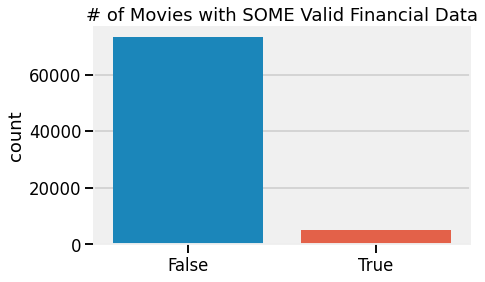

In [13]:
ax = sns.countplot(x=filter_financial)
ax.set_title('# of Movies with SOME Valid Financial Data');

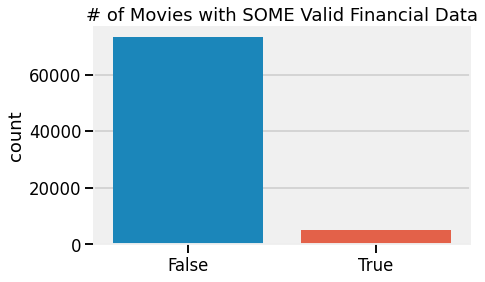

In [14]:
ax = sns.countplot(x=filter_financial)
ax.set_title('# of Movies with SOME Valid Financial Data');

>- There are 13,404 movies with financial data (either >0 for revenue OR budget)

<AxesSubplot:title={'center':'# of Movies with Both Revenue and Budget'}, ylabel='count'>

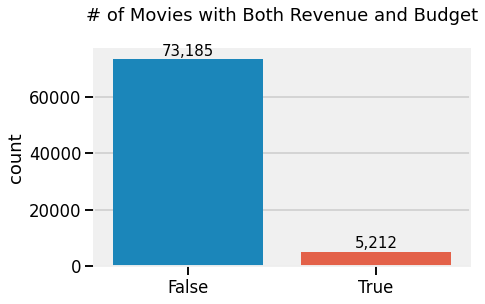

In [15]:
ax = sns.countplot(x=filter_and)
ax.set_title('# of Movies with Both Revenue and Budget',y=1.1);
pf.annotate_bars(ax,fmt=",")

In [16]:
## Using only filtered financial movies for remaining EDA
plot_df = df[filter_financial].copy()
plot_df

,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification,Release Year
3,False,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.wkw-inthemoodforlove.com/,843,tt0118694,cn,花樣年華,"Hong Kong, 1962: Chow Mo-Wan and Su Li-Zhen mo...",14.944,/iYypPT4bhqXfq1b6EnmxvRt6b2Y.jpg,"[{'id': 539, 'logo_path': None, 'name': 'Block...","[{'iso_3166_1': 'HK', 'name': 'Hong Kong'}]",2000-09-29,12854953,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,False,8.1,1879,PG,2000.0
11,False,/knok3mNReKqPTplnnqz7E4dd7mD.jpg,NaN,120000,"[{'id': 18, 'name': 'Drama'}, {'id': 27, 'name...",NaN,19085,tt0120467,en,Vulgar,Vulgar is about a man who is a children's clow...,3.692,/aLdezroGbHDP0w0jOLwxXjgrgma.jpg,"[{'id': 102045, 'logo_path': None, 'name': 'Ch...","[{'iso_3166_1': 'US', 'name': 'United States o...",2002-04-26,14904,87.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Everyone loves a clown... some more than others.,Vulgar,False,5.4,41,R,2002.0
13,False,/t7aJ7hqsMLEoqBJk7yAXxcAVvcz.jpg,"{'id': 718551, 'name': 'Chicken Run Collection...",45000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",NaN,7443,tt0120630,en,Chicken Run,Having been hopelessly repressed and facing ev...,35.780,/8XgmIsbpVamdhwcNVsYzohFZTtT.jpg,"[{'id': 521, 'logo_path': '/kP7t6RwGz2AvvTkvnI...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",2000-06-21,224834564,84.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,This ain't no chick flick. It's poultry in mot...,Chicken Run,False,6.7,4009,G,2000.0
16,False,/cXXxi0j9sXFt7LbeajuFoKFqWMu.jpg,NaN,8000000,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",NaN,318,tt0120753,en,The Million Dollar Hotel,The Million Dollar Hotel starts with a jump fr...,6.431,/7AjzGYybwfndxnpApKXahQiq2Zy.jpg,"[{'id': 1490, 'logo_path': None, 'name': 'Kint...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-02-09,105983,122.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Everyone has something to hide.,The Million Dollar Hotel,False,5.9,247,R,2000.0
17,False,/8XaohdSqoBEWHhW40q2VTdMBrV0.jpg,"{'id': 87359, 'name': 'Mission: Impossible Col...",125000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",NaN,955,tt0120755,en,Mission: Impossible II,With computer genius Luther Stickell at his si...,22.658,/2njB2A85Ni7bRR7vIOrfv6TBPeC.jpg,"[{'id': 4, 'logo_path': '/gz66EfNoYPqHTYI4q9UE...","[{'iso_3166_1': 'AU', 'name': 'Australia'}, {'...",2000-05-24,546388105,123.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Expect the impossible again.,Mission: Impossible II,False,6.1,5297,PG-13,2000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78320,False,/fEe5fe82qHzjO4yej0o79etqsWV.jpg,NaN,80000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",https://www.dreamworks.com/movies/the-bad-guys,629542,tt8115900,en,The Bad Guys,When the infamous Bad Guys are finally caught ...,3284.364,/7qop80YfuO0BwJa1uXk1DXUUEwv.jpg,"[{'id': 521, 'logo_path': '/kP7t6RwGz2AvvTkvnI...","[{'iso_3166_1': 'US', 'name': 'United States o...",2022-03-17,165558000,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Good is no fun at all.,The Bad Guys,False,7.8,465,PG,2022.0
78324,False,/d3l7kgFJyLTTQSrR4ysCk5yeVyW.jpg,NaN,75000000,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,579974,tt8178634,te,రౌద్రం రణం రుధిరం,A fictional history of two legendary revolutio...,50.872,/ncXklBeNi7X7OETqmDVEgaf8ItQ.jpg,"[{'id': 68594, 'logo_path': None, 'name': 'DVV...","[{'iso_3166_1': 'IN', 'name': 'India'}]",2022-03-24,160000000,187.0,"[{'english_name': 'Telugu', 

# Q2: What Years are represented?

In [17]:
years =sorted( plot_df['Release Year'].dropna().astype(int).unique())
# years

- Figure saved as Images/EDA_year_counts.png


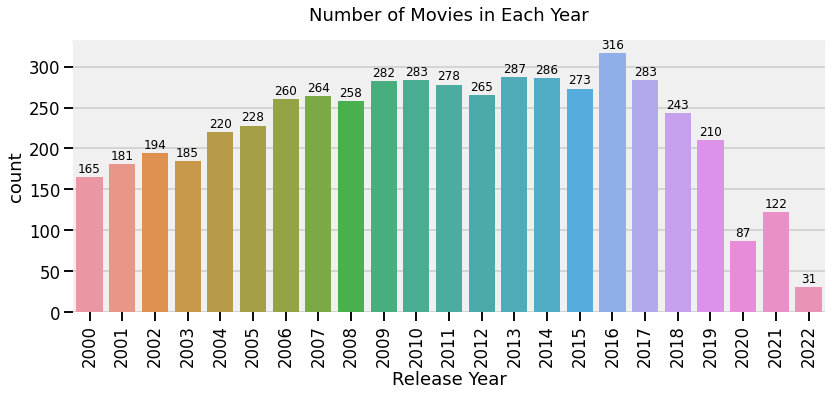

In [18]:
plt.figure(figsize=(12,5))
ax = sns.countplot(data=plot_df, x='Release Year', order =years );
ax.set_title('Number of Movies in Each Year',y=1.05)
pf.annotate_bars(ax, fmt=',',size=12,convert_millions=False,despine=True,
                 spines=['left','right','bottom'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax
pf.savefig('Images/EDA_year_counts.png',ax=ax, facecolor='white')

### Average Revenue By Year

In [19]:
mill_fmt = pf.get_funcformatter(kind='m',prefix="$",float_fmt=',.0f')
mill_fmt

- Figure saved as Images/EDA_avg_revenue_per_year.png


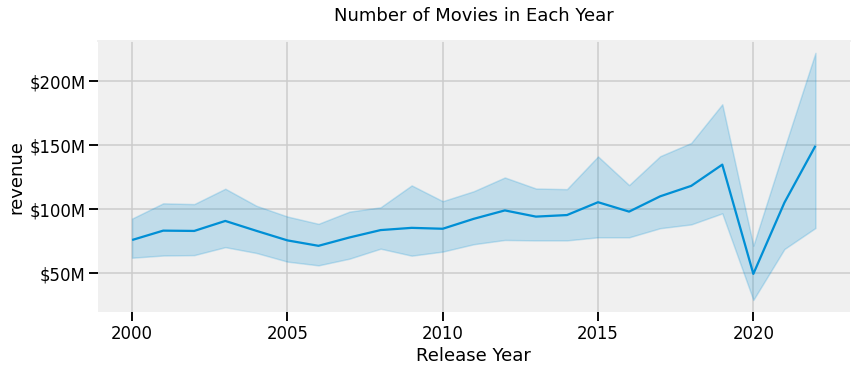

In [20]:
plt.figure(figsize=(12,5))
ax = sns.lineplot(data=plot_df, x='Release Year', y='revenue',)#,order =years );
ax.set_title('Number of Movies in Each Year',y=1.05)
pf.annotate_bars(ax, fmt=',',size=12,convert_millions=False,despine=True,
                 spines=['left','right','bottom'])
# ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.yaxis.set_major_formatter(mill_fmt)
pf.savefig('Images/EDA_avg_revenue_per_year.png',ax=ax, facecolor='white')

## Q3: How many movies are there in each of the certification categories (G/PG/PG-13/R)?

In [21]:
df['certification'].value_counts()

R                                  6441
NR                                 4405
PG-13                              3557
PG                                 1759
G                                   616
NC-17                               167
Unrated                               5
None                                  1
NRW                                   1
10                                    1
PG-13                                 1
R                                     1
Not Rated                             1
IMDB                                  1
ScreamFest Horror Film Festival       1
UR                                    1
-                                     1
TV-PG                                 1
Name: certification, dtype: int64

In [22]:
## fixing inconsitent certifications


# fix extra space certs
df['certification'] = df['certification'].str.strip()

## fix certification col
repl_cert = {'UR':'NR',
             'Not Rated':'NR',
             'Unrated':'NR',
             '-':'NR',
             '10':np.nan,
             'ScreamFest Horror Film Festival':'NR'}

df['certification'] = df['certification'].replace(repl_cert)
df['certification'].value_counts(dropna=False)

NaN      61437
R         6442
NR        4414
PG-13     3558
PG        1759
G          616
NC-17      167
IMDB         1
None         1
NRW          1
TV-PG        1
Name: certification, dtype: int64

In [23]:
## to order them (optional)
cert_order = ['G','PG','PG-13','R','NC-17','NR']

- Figure saved as Images/EDA_certification_counts.png


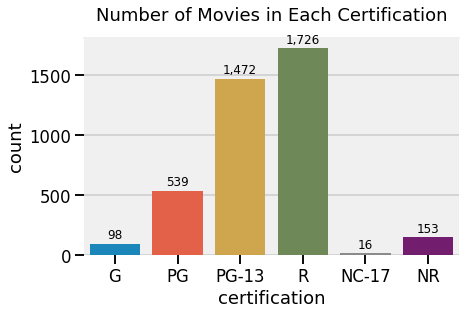

In [24]:
ax = sns.countplot(data=plot_df, x='certification',order=cert_order);
ax.set_title('Number of Movies in Each Certification',y=1.05)
pf.annotate_bars(ax,fmt=',',size=12,convert_millions=False,despine=True,
                 spines=['left','right','bottom'])
# sns.despine(ax.get_figure(),left=True)
pf.savefig('Images/EDA_certification_counts.png',ax=ax,
           facecolor='white')

## Q4: What is the average revenue per certification category?

- Figure saved as Images/EDA_avg_revenue_by_certification.png


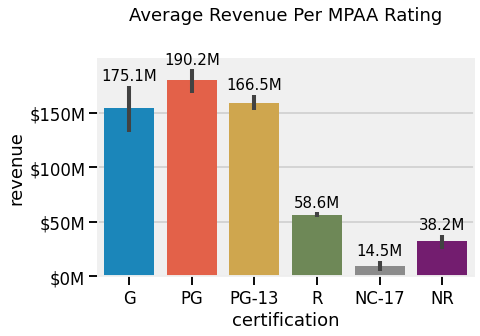

In [37]:
ax= sns.barplot(data=plot_df, x='certification',y='revenue', 
                order=cert_order,ci=68);
pf.annotate_bars(ax, convert_millions=True,fmt='.1f',use_errorbars=True,xytext=(0,10))
ax.set_title('Average Revenue Per MPAA Rating',y=1.15);
ax.yaxis.set_major_formatter(mill_fmt)
pf.savefig('Images/EDA_avg_revenue_by_certification.png',ax=ax, facecolor='white')

## Q5: What is the average budget per certification category?

- Figure saved as Images/EDA_avg_budget_certification.png


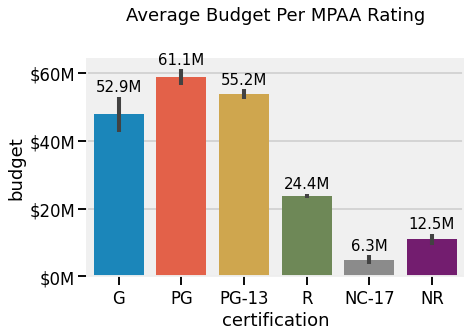

In [26]:
ax= sns.barplot(data=plot_df, x='certification',y='budget', 
                order=cert_order,ci=68);
pf.annotate_bars(ax, convert_millions=True,fmt='.1f',xytext= (0,10),use_errorbars=True)
ax.set_title('Average Budget Per MPAA Rating',y=1.15);
ax.yaxis.set_major_formatter(mill_fmt)
pf.savefig('Images/EDA_avg_budget_certification.png',ax=ax, facecolor='white')


## Q6: What is the average ROI (%) for Movies with All Financial Data?

In [27]:
## Save plot_df with movies that had buget AND revnue
plot_df = df[filter_and].copy()
## calculate ROI
plot_df['ROI (%)'] = (df['revenue']- df['budget'])/df['budget'] *100

plot_df.info()
plot_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5212 entries, 3 to 78378
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  5212 non-null   bool   
 1   backdrop_path          4961 non-null   object 
 2   belongs_to_collection  1144 non-null   object 
 3   budget                 5212 non-null   int64  
 4   genres                 5212 non-null   object 
 5   homepage               2505 non-null   object 
 6   id                     5212 non-null   int64  
 7   imdb_id                5212 non-null   object 
 8   original_language      5212 non-null   object 
 9   original_title         5212 non-null   object 
 10  overview               5204 non-null   object 
 11  popularity             5212 non-null   float64
 12  poster_path            5171 non-null   object 
 13  production_companies   5212 non-null   object 
 14  production_countries   5212 non-null   object 
 15  rel

,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification,Release Year,ROI (%)
3,False,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.wkw-inthemoodforlove.com/,843,tt0118694,cn,花樣年華,"Hong Kong, 1962: Chow Mo-Wan and Su Li-Zhen mo...",14.944,/iYypPT4bhqXfq1b6EnmxvRt6b2Y.jpg,"[{'id': 539, 'logo_path': None, 'name': 'Block...","[{'iso_3166_1': 'HK', 'name': 'Hong Kong'}]",2000-09-29,12854953,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,False,8.1,1879,PG,2000.0,8469.968667
11,False,/knok3mNReKqPTplnnqz7E4dd7mD.jpg,NaN,120000,"[{'id': 18, 'name': 'Drama'}, {'id': 27, 'name...",NaN,19085,tt0120467,en,Vulgar,Vulgar is about a man who is a children's clow...,3.692,/aLdezroGbHDP0w0jOLwxXjgrgma.jpg,"[{'id': 102045, 'logo_path': None, 'name': 'Ch...","[{'iso_3166_1': 'US', 'name': 'United States o...",2002-04-26,14904,87.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Everyone loves a clown... some more than others.,Vulgar,False,5.4,41,R,2002.0,-87.580000
13,False,/t7aJ7hqsMLEoqBJk7yAXxcAVvcz.jpg,"{'id': 718551, 'name': 'Chicken Run Collection...",45000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",NaN,7443,tt0120630,en,Chicken Run,Having been hopelessly repressed and facing ev...,35.780,/8XgmIsbpVamdhwcNVsYzohFZTtT.jpg,"[{'id': 521, 'logo_path': '/kP7t6RwGz2AvvTkvnI...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",2000-06-21,224834564,84.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,This ain't no chick flick. It's poultry in mot...,Chicken Run,False,6.7,4009,G,2000.0,399.632364
16,False,/cXXxi0j9sXFt7LbeajuFoKFqWMu.jpg,NaN,8000000,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",NaN,318,tt0120753,en,The Million Dollar Hotel,The Million Dollar Hotel starts with a jump fr...,6.431,/7AjzGYybwfndxnpApKXahQiq2Zy.jpg,"[{'id': 1490, 'logo_path': None, 'name': 'Kint...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-02-09,105983,122.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Everyone has something to hide.,The Million Dollar Hotel,False,5.9,247,R,2000.0,-98.675213
17,False,/8XaohdSqoBEWHhW40q2VTdMBrV0.jpg,"{'id': 87359, 'name': 'Mission: Impossible Col...",125000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",NaN,955,tt0120755,en,Mission: Impossible II,With computer genius Luther Stickell at his si...,22.658,/2njB2A85Ni7bRR7vIOrfv6TBPeC.jpg,"[{'id': 4, 'logo_path': '/gz66EfNoYPqHTYI4q9UE...","[{'iso_3166_1': 'AU', 'name': 'Australia'}, {'...",2000-05-24,546388105,123.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Expect the impossible again.,Mission: Impossible II,False,6.1,5297,PG-13,2000.0,337.110484


In [28]:
## remove NR from cert-order for ROI
cert_order_roi = cert_order[:-1]
cert_order_roi

['G', 'PG', 'PG-13', 'R', 'NC-17']

- Figure saved as Images/EDA_avg_roi_certification.png


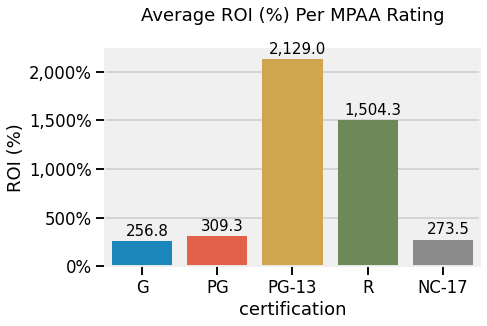

In [29]:
ax= sns.barplot(data=plot_df, x='certification',y='ROI (%)', 
                order=cert_order_roi,ci=None);
pf.annotate_bars(ax, convert_millions=False,ha='center',xytext=(5,10),fmt=',.1f')
ax.set_title('Average ROI (%) Per MPAA Rating',y=1.1);
ax.yaxis.set_major_formatter('{x:,.0f}%')
pf.savefig('Images/EDA_avg_roi_certification.png',ax=ax, facecolor='white')

# Summary

- According to initial EDA, R movies are more common, but generate less revenue. However, in terms of ROI, they are almost as successful as PG-13 movies.

# APPENDIX

In [30]:
# ## Testing new vers with dynamic number format
# from matplotlib.ticker import FuncFormatter
# def millions(x,pos,prefix='$', suffix=None,float_fmt=","):
#     """function for use wth matplotlib FuncFormatter -  formats money in millions"""
#     x = x*1e-6
#     if suffix is None:
#         suffix="M"
#     string = "{prefix}{x:"+float_fmt+"}{suffix}"
#     return string.format(prefix=prefix,x=x, suffix=suffix)

# fmt = FuncFormatter(lambda x,pos: millions(x,pos, float_fmt=',.0f'))

# # prefix='$'
# # suffix='M'
# # float_fmt = ".0f"

# # fmt = "{prefix}{x*1e-6:,"+float_fmt + "}{suffix}"
# # fmt.format(prefix=prefix, x=1e9,float_fmt=float_fmt, sff )

In [31]:
ax.lines

<Axes.ArtistList of 0 lines>

### BOOKMARK: Geting height of error bars for annotaitons 
- https://stackoverflow.com/questions/46270643/extracting-error-bars-and-point-positions-from-a-python-matplotlib-figure

In [32]:
# ax.lines

In [33]:
# def get_line_data(ax,just_error_heights=False):
#     """Adapted From Source: https://stackoverflow.com/a/46271417"""
#     x_list = []
#     lower_list = []
#     upper_list = []
#     for line in ax.lines:
#         x_list.append(line.get_xdata()[0])
#         lower_list.append(line.get_ydata()[0])
#         upper_list.append(line.get_ydata()[1])
        
#     y = 0.5 * (np.asarray(lower_list) + np.asarray(upper_list))
#     y_error = np.asarray(upper_list) - y
#     x = np.asarray(x_list)
    
#     if just_error_heights==False:
#         return x, y, y_error
#     else: 
#         return upper_list

In [34]:
# x_pos,y_pos,y_error = get_line_data(ax)
# y_error

In [35]:
# err_height= get_line_data(ax,just_error_heights=True)
# err_height

In [36]:
# ax.get_figure()